# Versuch 255: Röntgenspektrometer

## Auswertung der Messergebnisse

In [2]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.optimize import curve_fit
from scipy.stats import chi2

plt.style.use('default')
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9
plt.rcParams['errorbar.capsize']=2

In [3]:

def linear(x,a,b):
    return a*x+b

def gaussian(x, A, mu, sig, y0):
    return y0 + (A*np.exp(-(x-mu)**2/(2*sig**2)))

#Berücksichtung des Untergrunds
def gauß_optimiert(x, a, c, A1, mu1, sig1, A2, mu2, sig2):
    return linear(x, a, c)+gaussian(x, A1, mu1, sig1, 0)+gaussian(x, A2, mu2, sig2, 0)

### Teil 1: Messung des Röntgensprektrums mit einem LiF-Kristall

#### a) Bestimmung $\lambda_{gr}$ und $h$

In [4]:

beta1, counts1=np.loadtxt('a1_korte_data-1.txt',skiprows=0, usecols=(0,1), unpack=True,)
beta1=beta1*(2*np.pi/360)
counts1_err=np.sqrt(counts1)#/np.sqrt(5)

In [5]:
popt1,pcov1=curve_fit(linear,beta1[13:18],counts1[13:18],sigma=counts1_err[13:18])
popt2,pcov2=curve_fit(linear,beta1[:13],counts1[:13],sigma=counts1_err[:13])

#Schnittpunkt
beta0=(popt2[1]-popt1[1])/(popt1[0]-popt2[0])
d_beta0=np.sqrt(pcov2[1,1]/(popt1[0]-popt2[0])**2+pcov1[1,1]/(popt1[0]-popt2[0])**2+((popt2[1]-popt1[1])*pcov1[0,0]**0.5/(popt1[0]-popt2[0])**2)**2+((popt2[1]-popt1[1])*pcov2[0,0]**0.5/(popt1[0]-popt2[0])**2)**2)


print('Schnittpunkt: beta0=',beta0,'+-',d_beta0)
print(popt1, popt2)

Schnittpunkt: beta0= 0.08818041157480375 +- 0.008906894824853394
[9683.41394279 -825.19925216] [3.24043900e+02 1.13850309e-01]


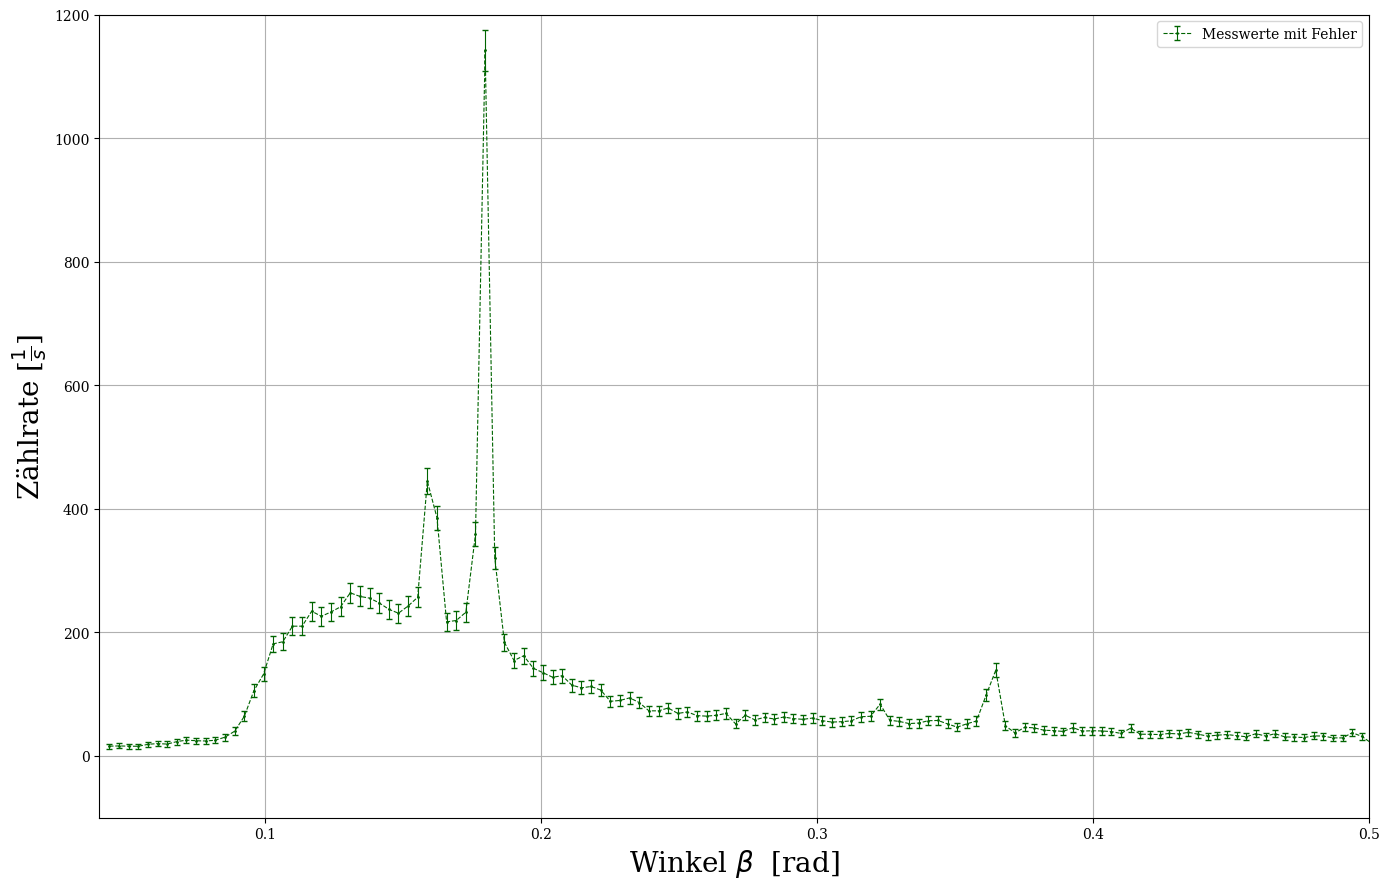

In [13]:
plt.errorbar(beta1, counts1, yerr=counts1_err,linewidth=0.8,linestyle='--',marker='.',markersize=2,color='darkgreen',label='Messwerte mit Fehler')
#plt.plot(np.linspace(0.075,0.109,2),linear(np.linspace(0.075,0.109,2),*popt1),linewidth=0.8,color='darkred',label='lin. Fit Anstieg')
#plt.plot(np.linspace(0.045,0.11,2),linear(np.linspace(0.045,0.11,2),*popt2),linewidth=0.8,color='darkblue',label='lin. Fit Untergrund')
plt.xlabel(r'Winkel $ \beta$  [rad]', size=20)
plt.ylabel(r'Zählrate [$\frac{1}{s}$]', size=20)
#plt.title(r'Diagramm 1: Grenzwellenlänge der Röntgenstrahlung', size=22)
plt.xlim(0.04,0.5)
plt.ylim(-100,1200)
plt.grid()

#plt.plot(beta0, linear(beta0,*popt1),color = 'red',marker='o',markersize=5,label='Schnittpunkt der Geraden')

plt.legend(frameon=True)

plt.tight_layout()
plt.savefig('V255Diagramm5.pdf', format='PDF')

In [14]:
#Güte des Fits, Anstieg
chi2_1=np.sum((linear(beta1[10:15],*popt1)-counts1[10:15])**2/counts1_err[10:15]**2)
dof1=len(beta1[10:15])-2
chi2_1_red=chi2_1/dof1

print('Die Güte des Fits beträgt: chi^2=',chi2_1)
print('chi2_red=',chi2_1_red)
print()
prob1=round(1-chi2.cdf(chi2_1,dof1),3)*100

print('Die Fitwahrscheinlichkeit beträgt: ',prob1,' %')

Die Güte des Fits beträgt: chi^2= 476.702781639901
chi2_red= 158.90092721330032

Die Fitwahrscheinlichkeit beträgt:  0.0  %


In [15]:
#Güte des Fits, Untergrund
chi2_2=np.sum((linear(beta1[:9],*popt2)-counts1[:9])**2/counts1_err[:9]**2)
dof2=len(beta1[:9])-2

chi2_2_red=chi2_2/dof2

print('Die Güte des Fits beträgt: chi^2=',chi2_2)
print('chi2_red=',chi2_2_red)
print()

#Fitwahrscheinlichkeit
prob2=round(1-chi2.cdf(chi2_2,dof2),3)*100

print('Die Fitwahrscheinlichkeit beträgt: ',prob2,' %')

Die Güte des Fits beträgt: chi^2= 0.9220403410398893
chi2_red= 0.1317200487199842

Die Fitwahrscheinlichkeit beträgt:  99.6  %


In [16]:
#Grenzwellenlänge aus beta0
d_LiF=201.4e-12 #[m]
lambda_gr=2*d_LiF*np.sin(beta0)
dlambda_gr=2*np.sqrt((d_LiF*np.cos(beta0)*d_beta0)**2)

print('Grenzwällenlänge lambda_gr=',lambda_gr,'+-',dlambda_gr)

Grenzwällenlänge lambda_gr= 3.547305623396219e-11 +- 3.573757690391258e-12


In [17]:
#Plancksches Wirkungsquantum aus Gl. (1)

e=1.60221e-19 #C
c=2.9979e8 #m/s
U0= 35e3 #V

h1=lambda_gr*e*U0/c
dh1=h1*(dlambda_gr/lambda_gr)

print('Planksches Wirkungsquantum h=',h1,'+-',dh1)
print()

#Vergleich mit dem Literaturwert
h_lit=6.6261e-34 #Js

diff_h1=np.abs(h_lit-h1)
print('Differenz zu Literaturwert diff_h=',diff_h1,'+-',dh1)

Planksches Wirkungsquantum h= 6.635428099675038e-34 +- 6.684908129666174e-35

Differenz zu Literaturwert diff_h= 9.328099675037897e-37 +- 6.684908129666174e-35


In [19]:
#mit dem Bragg'schen Gesetz folgt die Beziehung zwischen theta1 und theta2 zu sin(theta1)/sin(theta2)=n1/n2=1/2
theta2=np.arcsin(2*np.sin(beta0))
dtheta2=2*np.cos(beta0)*(2*np.cos(2*beta0)-1)**(-0.5)*d_beta0
print('Das Spektrum zweiter Ordnung setzt bei theta=',theta2,'+-',dtheta2)

Das Spektrum zweiter Ordnung setzt bei theta= 0.1770559885663019 +- 0.01802639213466684


#### b) Analyse der $K_\alpha$ und $K_\beta$ Linien

##### erste Ordnung

In [20]:
beta2, counts2=np.loadtxt('b1_korte_data-1.txt',skiprows=1, usecols=(0,1), unpack=True)
beta2=beta2*(2*np.pi)/360
#statistischer Fehler
counts2_err=np.sqrt(counts2)
popt3,pcov3=curve_fit(gauß_optimiert,beta2,counts2,sigma=counts2_err,p0=[7000,2000,1000,0.156,0.003,2300,0.176,0.003])
print(popt3)

[-3.70864496e+03  1.01794145e+03  5.85090527e+02  1.52402959e-01
  2.06043634e-03  1.99147633e+03  1.72268691e-01  1.91266690e-03]


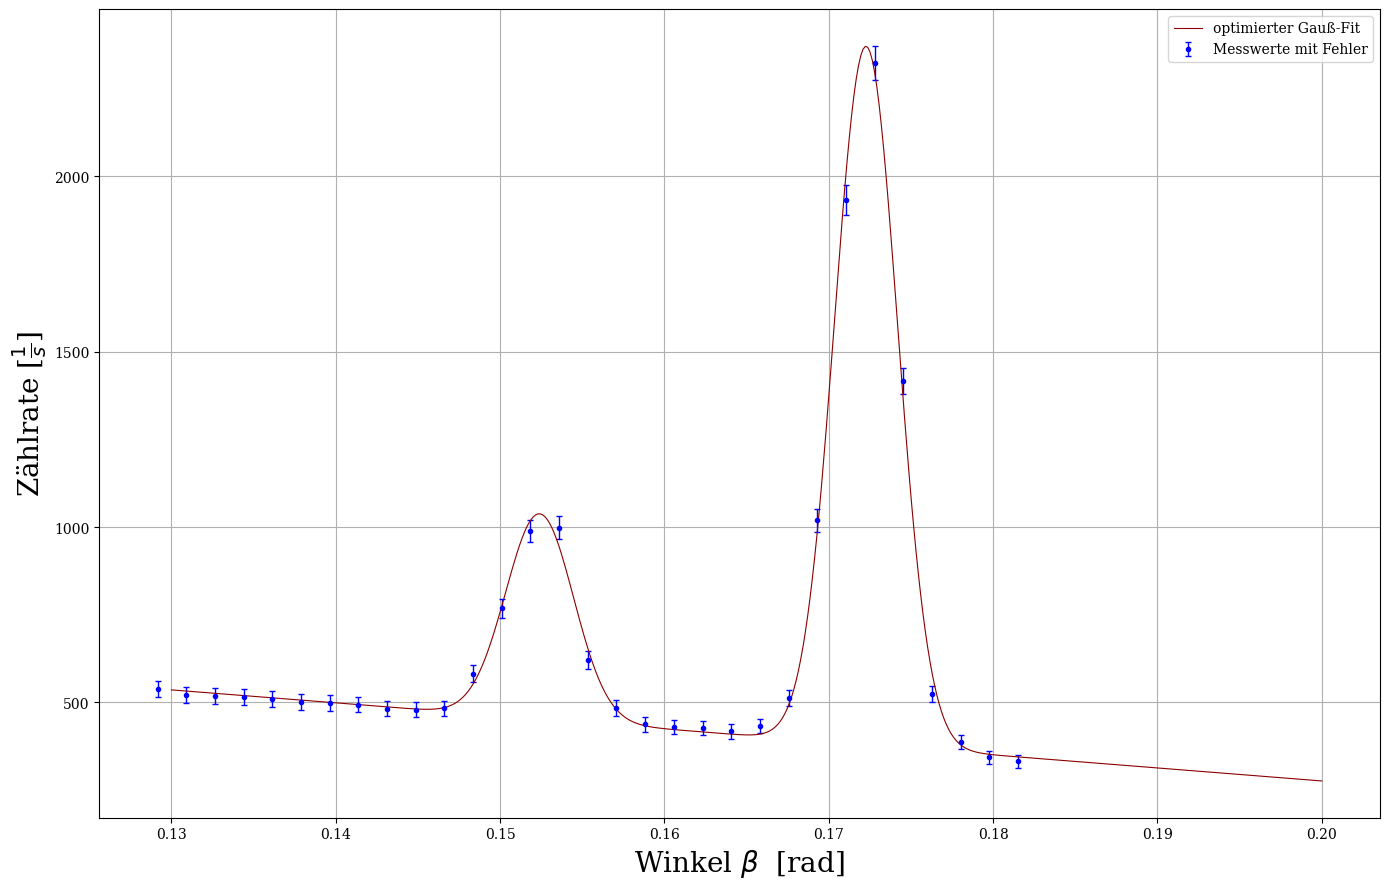

In [22]:

plt.errorbar(beta2, counts2, yerr=counts2_err,linewidth=1,fmt='b.',linestyle='',label='Messwerte mit Fehler')
plt.plot(np.linspace(0.13,0.20,500),gauß_optimiert(np.linspace(0.13,0.20,500),*popt3),linewidth=0.8,color='darkred',label='optimierter Gauß-Fit')
plt.xlabel(r'Winkel $ \beta$  [rad]', size=20)
plt.ylabel(r'Zählrate [$\frac{1}{s}$]', size=20)
#plt.title(r'Diagramm 6: Analyse der $K_\alpha$- & $K_\beta$-Linie (LiF, erste Ordnung)', size=22)
plt.grid()
plt.legend(frameon=True)
plt.tight_layout()
plt.savefig('V255Diagramm6.pdf', format='PDF')

In [23]:
chi2_3=np.sum((gauß_optimiert(beta2,*popt3)-counts2)**2/counts2_err**2)

dof3=len(beta2)-8

chi2_3_red=chi2_3/dof3

print('Die Güte des Fits beträgt: chi^2=',chi2_3)
print('chi2_red=',chi2_3_red)
print()

prob3=round(1-chi2.cdf(chi2_3,dof3),2)*100

print('Fitwahrscheinlichkeit: ',prob3,' %')

Die Güte des Fits beträgt: chi^2= 24.79821626904241
chi2_red= 1.0781833160453222

Fitwahrscheinlichkeit:  36.0  %


In [24]:
#gesuchte Winkel entsprechen Mittelwerten der Gaußkurven
print('Für die erste Ordnung folgen die berechneten Winkel:')
print('K_alpha_1: (',popt3[6],' +/- ',popt3[7],') rad' )
print('K_beta_1: (',popt3[3],' +/- ',popt3[4],') rad' )

Für die erste Ordnung folgen die berechneten Winkel:
K_alpha_1: ( 0.17226869066109718  +/-  0.0019126668973202018 ) rad
K_beta_1: ( 0.15240295920488126  +/-  0.0020604363372916713 ) rad


In [25]:
#Wellenlänge analog wie Grenzwellenlänge
lambdaK_beta1=2*d_LiF*np.sin(popt3[3])
lambdaK_beta1_err=2*np.sqrt((d_LiF*np.cos(popt3[3])*popt3[4])**2)

lambdaK_alpha1=2*d_LiF*np.sin(popt3[6])
lambdaK_alpha1_err=2*np.sqrt((d_LiF*np.cos(popt3[6])*popt3[7])**2)

print('Daraus Wellenlängen')
print('K_alpha_1: (',lambdaK_alpha1*1e12,' +/- ',lambdaK_alpha1_err*1e12,') pm' )
print('K_beta_1: (',lambdaK_beta1*1e12,' +/- ',lambdaK_beta1_err*1e12,') pm' )

Daraus Wellenlängen
K_alpha_1: ( 69.04712960374646  +/-  0.7590187511214741 ) pm
K_beta_1: ( 61.150548413534466  +/-  0.8203239863538175 ) pm


In [26]:
#Vergleich mit Literaturwerten
lambdaK_alphalit=71.1e-12 #m
lambdaK_betalit=63.1e-12 #m

diffalpha1=np.abs(lambdaK_alpha1-lambdaK_alphalit)
diffbeta1=np.abs(lambdaK_beta1-lambdaK_betalit)

print('Der Vergleich mit den Literaturwerten liefert:')
print('diff_lambdaK_alpha1 =(',diffalpha1*1e12,' +/- ',lambdaK_alpha1_err*1e12,') pm => sigma = ',round(diffalpha1/lambdaK_alpha1_err,2))
print('diff_lambdaK_beta1 =(',diffbeta1*1e12,' +/- ',lambdaK_beta1_err*1e12,') pm => sigma = ',round(diffbeta1/lambdaK_beta1_err,2))

Der Vergleich mit den Literaturwerten liefert:
diff_lambdaK_alpha1 =( 2.052870396253555  +/-  0.7590187511214741 ) pm => sigma =  2.7
diff_lambdaK_beta1 =( 1.949451586465526  +/-  0.8203239863538175 ) pm => sigma =  2.38


##### Halbwersbreite für $K_\alpha$ in erster Ordnung

In [27]:
#Wir wissen: FWHM = 2*sqrt(2*ln(2))*sigma (=2.35482*sigma=2.4*sigma)

FWHM_K_alpha1=2*np.sqrt(2*np.log(2))*popt3[7] #rad
FWHM_K_alpha1_err=2*np.sqrt(2*np.log(2))*pcov3[7,7]**0.5

FWHM2_K_alpha1=2*d_LiF*np.sin(FWHM_K_alpha1) #m
FWHM2_K_alpha1_err=2*np.sqrt((d_LiF*np.cos(FWHM_K_alpha1)*FWHM_K_alpha1_err)**2)

print('Aus dem Fit folgt für die Halbwertsbreite: ')
print('FWHM_K_alpha1 = (',FWHM_K_alpha1*1e3, ' +/- ',FWHM_K_alpha1_err*1e3,') 10^-3 rad' )
print('              = (',FWHM2_K_alpha1*1e12,' +/- ',FWHM2_K_alpha1_err*1e12,') pm' )

Aus dem Fit folgt für die Halbwertsbreite: 
FWHM_K_alpha1 = ( 4.503986349276763  +/-  0.08145284040376692 ) 10^-3 rad
              = ( 1.814199567697768  +/-  0.032808871333197265 ) pm


##### zweite Ordnung

In [28]:
beta3, counts3=np.loadtxt('b2&3_korte_data.txt',skiprows=1, usecols=(0,1), unpack=True)
beta3=beta3*(2*np.pi)/360
counts3_err=np.sqrt(counts3)

In [29]:
#Fit der Messdaten
popt4,pcov4=curve_fit(gauß_optimiert,beta3,counts3,sigma=counts3_err,p0=[100,300,40,0.318,0.002,200,0.36,0.002])
print(popt4)

[-5.27876875e+02  2.64215164e+02  8.78799861e+01  3.13970349e-01
  1.92557029e-03  3.30107051e+02  3.55326178e-01  2.40260329e-03]


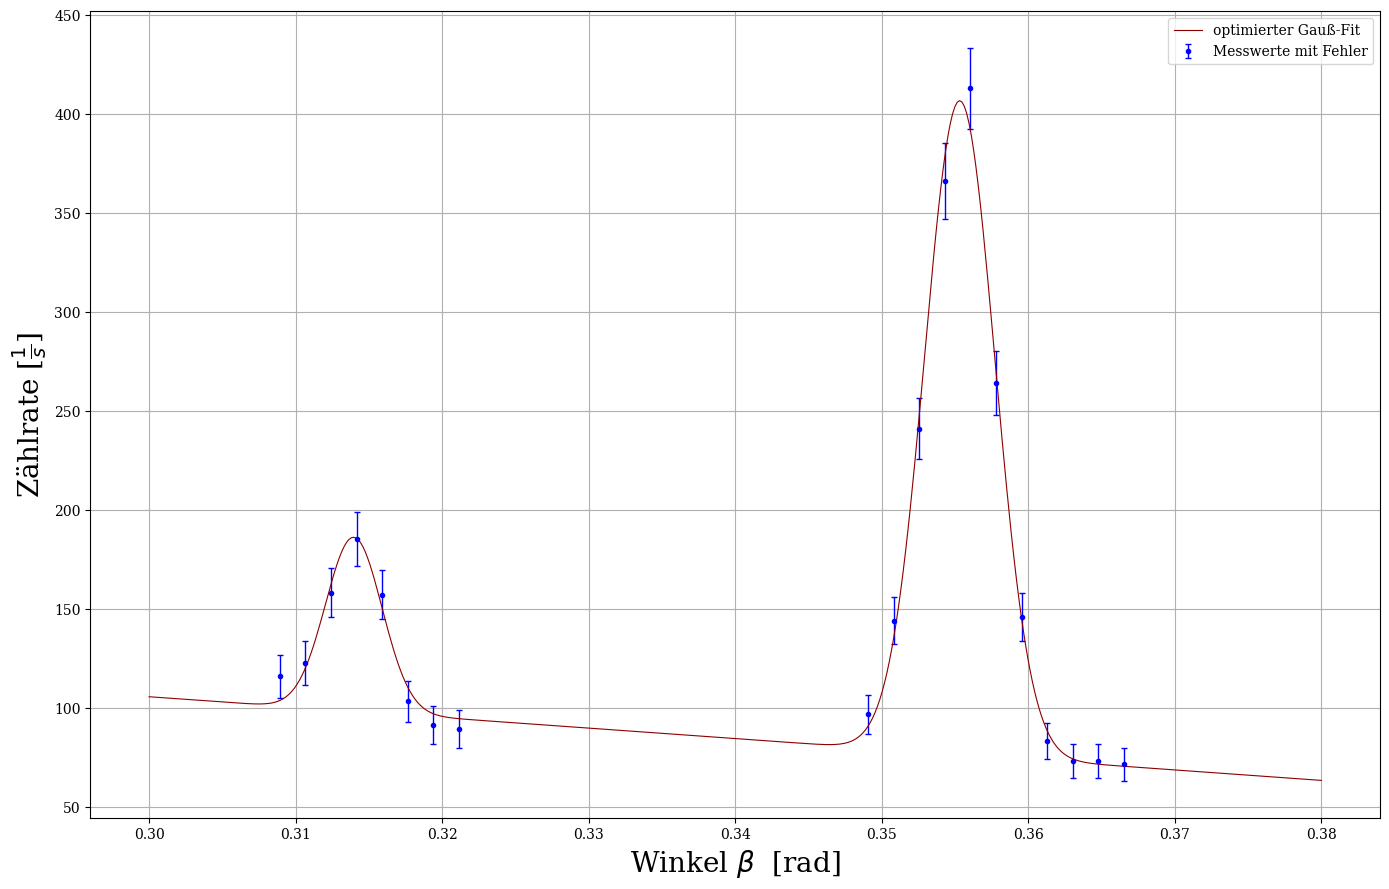

In [31]:
#Plot der Messdaten
plt.errorbar(beta3, counts3, yerr=counts3_err,linewidth=1,fmt='b.',linestyle='',label='Messwerte mit Fehler')
plt.plot(np.linspace(0.30,0.38,500),gauß_optimiert(np.linspace(0.30,0.38,500),*popt4),linewidth=0.8,color='darkred',label='optimierter Gauß-Fit')
plt.xlabel(r'Winkel $ \beta$  [rad]', size=20)
plt.ylabel(r'Zählrate [$\frac{1}{s}$]', size=20)
#plt.title(r'Diagramm 7: Analyse der $K_\alpha$- & $K_\beta$-Linie (LiF, zweite Ordnung)', size=22)
plt.grid()
plt.legend(frameon=True)
plt.tight_layout()
plt.savefig('V255Diagramm7.pdf', format='PDF')

In [32]:
 
chi2_4=np.sum((gauß_optimiert(beta3,*popt4)-counts3)**2/counts3_err**2)

dof4=len(beta3)-8

chi2_4_red=chi2_4/dof4

print('Güte des Fits:')
print('chi2= ',chi2_4)
print('chi2_red= ',chi2_4_red)
print()

#Fitwahrscheinlichkeit
prob4=round(1-chi2.cdf(chi2_4,dof4),3)*100

print('Fitwahrscheinlichkeit',prob4,' %')

Güte des Fits:
chi2=  6.07618725178876
chi2_red=  0.5523806592535236

Fitwahrscheinlichkeit 86.8  %


In [33]:
#gesuchte Winkel aus Gaußkurven
print('Für die zweite Ordnung folgen die berechneten Winkel:')
print('K_alpha_2: (',popt4[6],' +/- ',popt4[7],') rad' )
print('K_beta_2: (',popt4[3],' +/- ',popt4[4],') rad' )

Für die zweite Ordnung folgen die berechneten Winkel:
K_alpha_2: ( 0.3553261775889331  +/-  0.002402603290456352 ) rad
K_beta_2: ( 0.3139703494698608  +/-  0.0019255702905726765 ) rad


In [36]:
#Wellenlänge analog Grenzwellenlänge (allerdings Ordnung 2, deshalb Vorfaktor=1, da 0.5*2)
lambdaK_beta2=d_LiF*np.sin(popt4[3])
lambdaK_beta2_err=np.sqrt((d_LiF*np.cos(popt4[3])*popt4[4])**2)

lambdaK_alpha2=d_LiF*np.sin(popt4[6])
lambdaK_alpha2_err=np.sqrt((d_LiF*np.cos(popt4[6])*popt4[7])**2)

print('Wellenlängen:')
print('K_alpha_2: (',lambdaK_alpha2*1e12,' +/- ',lambdaK_alpha2_err*1e12,') pm' )
print('K_beta_2: (',lambdaK_beta2*1e12,' +/- ',lambdaK_beta2_err*1e12,') pm' )

Wellenlängen:
K_alpha_2: ( 70.06629186260942  +/-  0.45365753232750283 ) pm
K_beta_2: ( 62.1998360817144  +/-  0.3688517241955787 ) pm


In [37]:
#Vergleich mit Literaturwerten

diffalpha2=np.abs(lambdaK_alpha2-lambdaK_alphalit)
diffbeta2=np.abs(lambdaK_beta2-lambdaK_betalit)

print('Der Vergleich mit den Literaturwerten liefert:')
print('diff_lambdaK_alpha2 =(',diffalpha2*1e12,' +/- ' ,lambdaK_alpha2_err*1e12,') pm => sigma = ',round(diffalpha2/lambdaK_alpha2_err,2))
print('diff_lambdaK_beta2 =(',diffbeta2*1e12,' +/- ',lambdaK_beta2_err*1e12,') pm => sigma = ',round(diffbeta2/lambdaK_beta2_err,2))

Der Vergleich mit den Literaturwerten liefert:
diff_lambdaK_alpha2 =( 1.033708137390593  +/-  0.45365753232750283 ) pm => sigma =  2.28
diff_lambdaK_beta2 =( 0.9001639182855891  +/-  0.3688517241955787 ) pm => sigma =  2.44


#### c) Bestimmung der Einsatzspannung $U$ und erneute Bestimmung von $h$

In [38]:
#eingestellte Beschleunigungsspannungen 
U=np.linspace(20,35,16)

#gemessene Zählraten
counts4=np.array([1.4,1.6,4.15,30.65,86.65,106.9,151.2,191.7,242.6,277.80,318.20,354,396.80,430.90,462.90,494.20])
counts4_err=np.sqrt(counts4)

[  39.51057951 -870.62832714] [  3.06564351 -61.12284251]


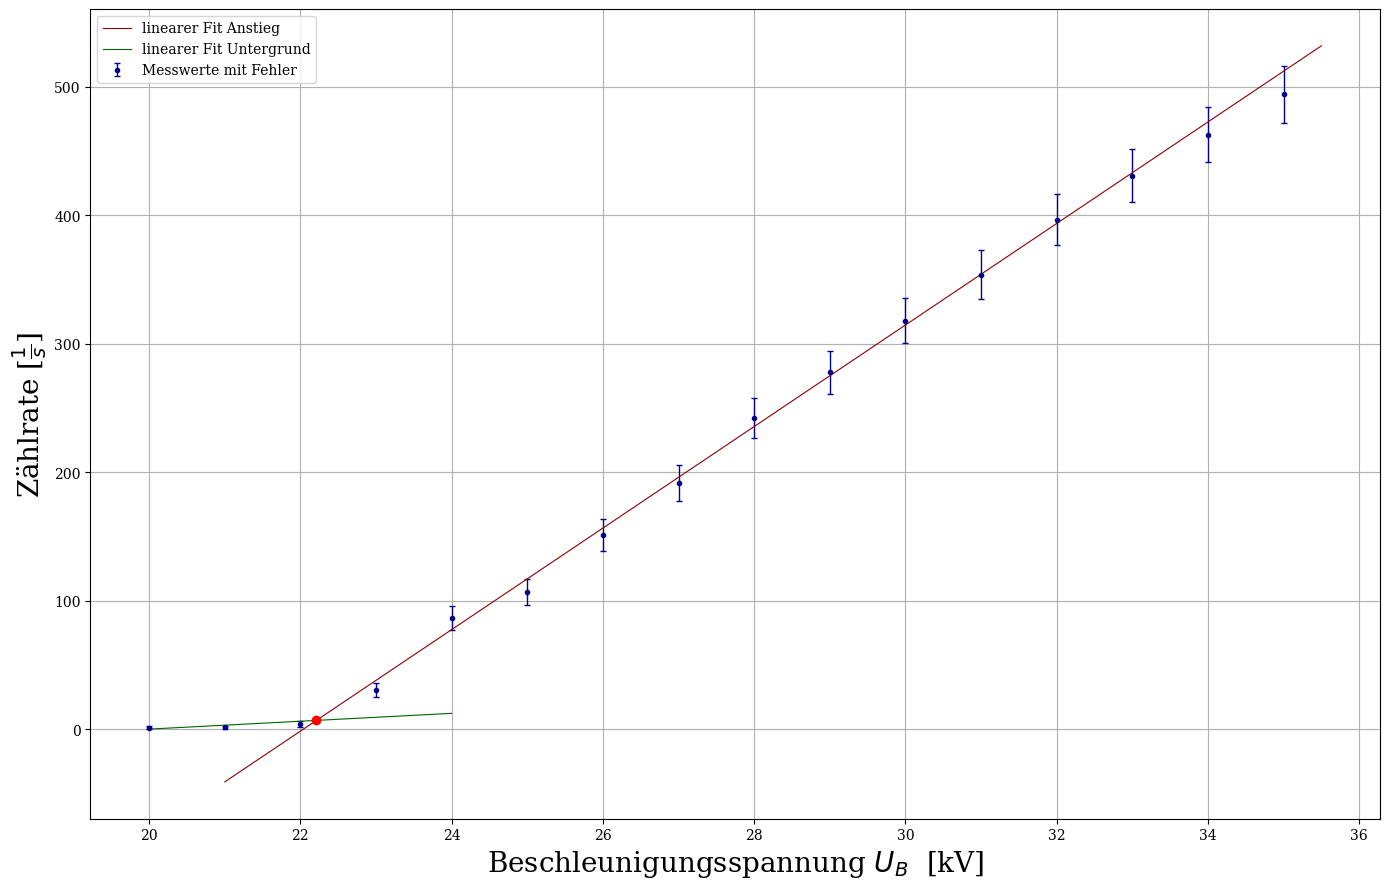

In [42]:
 
popt5,pcov5=curve_fit(linear,U[4:-2],counts4[4:-2],sigma=counts4_err[4:-2])
popt6,pcov6=curve_fit(linear,U[:4],counts4[:4],sigma=counts4_err[:4])
UE=(popt6[1]-popt5[1])/(popt5[0]-popt6[0])

#Plot der Messdaten
plt.errorbar(U, counts4, yerr=counts4_err,linewidth=1,linestyle=' ',marker='.',color='darkblue',label='Messwerte mit Fehler')
plt.xlabel(r'Beschleunigungsspannung $U_B$  [kV]', size=20)
plt.ylabel(r'Zählrate [$\frac{1}{s}$]', size=20)
#plt.title(r'Diagramm 8: Spannungsabhängigkeit der Zählrate für $\beta=7.5$° ', size=22)
plt.grid()
#Fit linearer Anstieg
plt.plot(np.linspace(21,35.5),linear(np.linspace(21,35.5),*popt5),linewidth=0.8,color='darkred',label='linearer Fit Anstieg')

#Fit Untergrund
plt.plot(np.linspace(20,24,2),linear(np.linspace(20,24,2),*popt6),linewidth=0.8,color='darkgreen',label='linearer Fit Untergrund')
plt.plot(UE, linear(UE, *popt5), 'o', color='red')

plt.legend(frameon=True)
plt.tight_layout()
plt.savefig('V255Diagramm8.pdf', format='PDF')
print(popt5, popt6)

In [43]:
#Güte des Fits des Anstiegs
chi2_5=np.sum((linear(U[4:-2],*popt5)-counts4[4:-2])**2/counts4_err[4:-2]**2)

#Freiheitsgrade
dof5=len(counts4[4:-2])-2

chi2_5_red=chi2_5/dof5

print('Güte des Fits:')
print('chi_squared= ',chi2_5)
print('chi_squared_red= ',chi2_5_red)
print()


#Fitwahrscheinlichkeit
prob5=round(1-chi2.cdf(chi2_5,dof5),3)*100

print('Fitwahrscheinlichkeit:',prob5,' %')

Güte des Fits:
chi_squared=  2.518111495208806
chi_squared_red=  0.31476393690110077

Fitwahrscheinlichkeit: 96.1  %


In [44]:
#Güte des Fits des Untergrundes
chi2_6=np.sum((linear(U[:4],*popt6)-counts4[:4])**2/counts4_err[:4]**2)

#Freiheitsgrade
dof6=len(counts4[:4])-2

chi2_6_red=chi2_6/dof6

print('Güte des Fits:')
print('chi_squared= ',chi2_6)
print('chi_squared_red= ',chi2_6_red)
print()


#Fitwahrscheinlichkeit
prob6=round(1-chi2.cdf(chi2_6,dof6),3)*100

print('Fitwahrscheinlichkeit: ',prob6,' %')

Güte des Fits:
chi_squared=  18.646028028327358
chi_squared_red=  9.323014014163679

Fitwahrscheinlichkeit:  0.0  %


In [45]:
#Spannungsgrenze aus Schnittpunkt
UE=(popt6[1]-popt5[1])/(popt5[0]-popt6[0])
UE_err=np.sqrt(pcov6[1,1]/(popt5[0]-popt6[0])**2+pcov5[1,1]/(popt5[0]-popt6[0])**2+((popt6[1]-popt5[1])*pcov5[0,0]**0.5/(popt5[0]-popt6[0])**2)**2+((popt6[1]-popt5[1])*pcov6[0,0]**0.5/(popt5[0]-popt6[0])**2)**2)

print('UE = ',UE,' +/- ',UE_err,' kV')

UE =  22.211741152243707  +/-  2.7124539895345867  kV


##### Bestimmung von $h$ aus $U_E$

In [47]:
#Wellenlänge für theta=7.5°
lambda_U=2*d_LiF*np.sin(7.5*(2*np.pi)/360)
#Daraus folgt mit UE und Gl.(1):
h2=lambda_U*e*(UE*1e3)/c
h2_err=h2*np.sqrt((UE_err/UE)**2)

print('h=',h2,'+-',h2_err)
diff_h2=np.abs(h_lit-h2)

print('diff_h1 =(',diff_h2,' +/- ',h2_err,') Js')
lambda_U

h= 6.241256483276339e-34 +- 7.621699231832361e-35
diff_h1 =( 3.8484351672366133e-35  +/-  7.621699231832361e-35 ) Js


5.2575950226236776e-11

### Teil 2: Messung des Röntgensprektrums mit einem NaCl-Kristall 

#### Bestimmung der Lage der $K_\alpha$ und der $K_\beta$

In [48]:

beta4, counts5=np.loadtxt('2_korte_data.txt',skiprows=1, usecols=(0,1), unpack=True)
beta4=beta4*(2*np.pi)/360
counts5_err=np.sqrt(counts5)

In [49]:

mask1=np.all([beta4>0.095, beta4<0.142],axis=0)
popt7,pcov7=curve_fit(gauß_optimiert,beta4[mask1],counts5[mask1],sigma=counts5_err[mask1],p0=[-12500,2180,880,0.111,0.002,2310,0.1253,0.002])

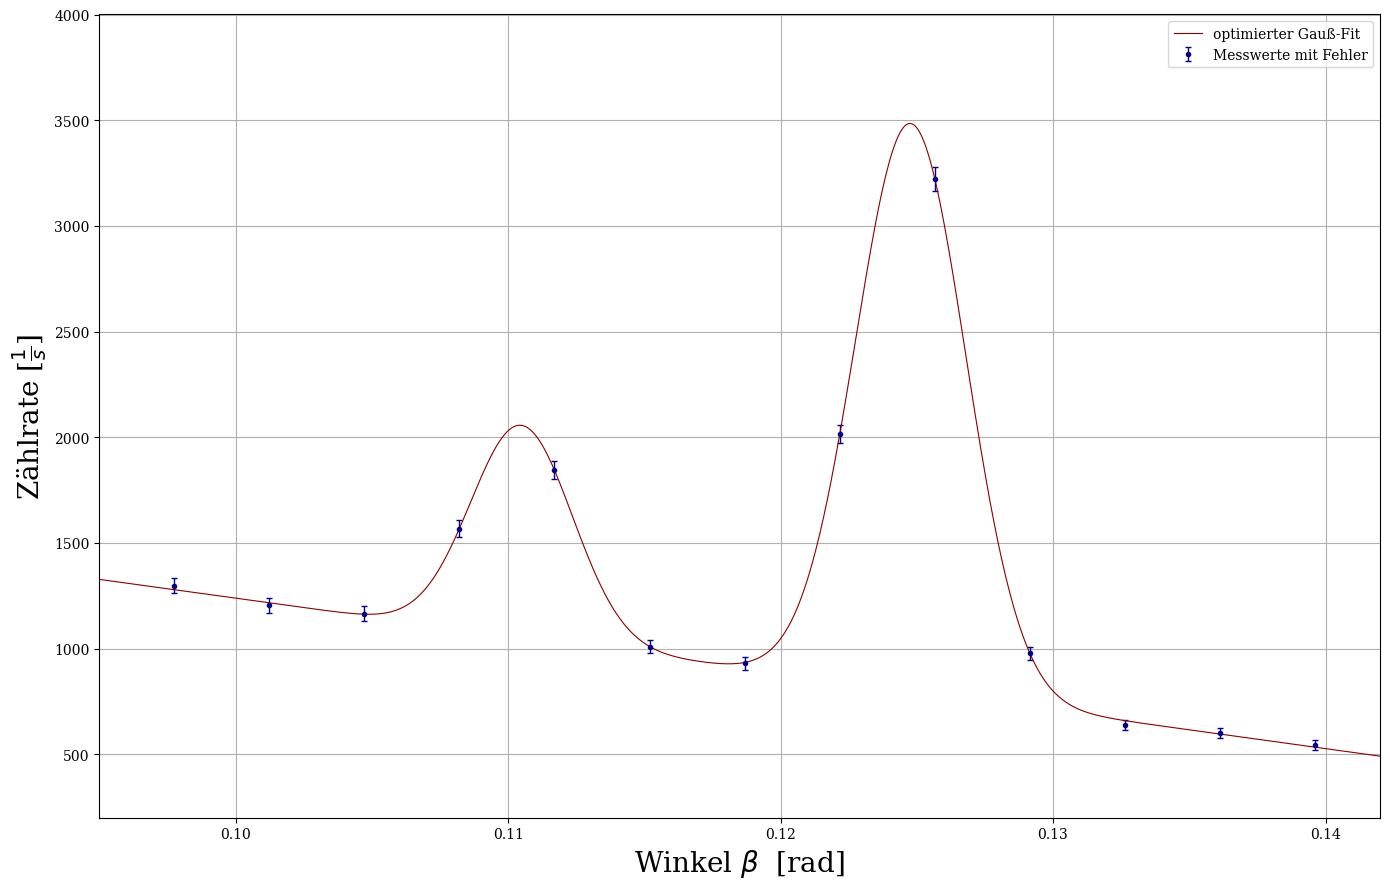

In [57]:

plt.errorbar(beta4, counts5, yerr=counts5_err,linewidth=1,linestyle=' ',marker='.',color='darkblue',label='Messwerte mit Fehler')
x=np.linspace(0.095,0.142,1000)
plt.plot(x,gauß_optimiert(x,*popt7),linewidth=0.8,color='darkred',label='optimierter Gauß-Fit')
plt.xlabel(r'Winkel $\beta$  [rad]', size=20)
plt.ylabel(r'Zählrate [$\frac{1}{s}$]', size=20)
#plt.title(r'Diagramm 9: Analyse der $K_\alpha$- & $K_\beta$-Linie (NaCl, erste Ordnung)', size=22)
plt.grid()
plt.legend(frameon=True)
plt.xlim(0.095,0.142)
plt.ylim(200,4000)
plt.tight_layout()
plt.savefig('V255Diagramm9.pdf', format='PDF')

In [58]:
#Güte des Fits 
chi2_7=np.sum((gauß_optimiert(beta4[mask1],*popt7)-counts5[mask1])**2/counts5_err[mask1]**2)

#Freiheitsgrade
dof7=len(beta4[mask1])-8

chi2_7_red=chi2_7/dof7

print('Güte des Fits:')
print('chi_squared= ',chi2_7)
print('chi_squared_red= ',chi2_7_red)
print()

#Fitwahrscheinlichkeit
prob7=round(1-chi2.cdf(chi2_7,dof7),3)*100

print('Fitwahrscheinlichkeit: ',prob7,' %')

Güte des Fits:
chi_squared=  1.358215865362891
chi_squared_red=  0.27164317307257824

Fitwahrscheinlichkeit:  92.9  %


In [59]:
#gesuchte Winkel entsprechen Mittelwerten der Gaußkurven
print('Für die erste Ordnung folgen die berechneten Winkel:')
print('K_alpha_2: (',popt7[6],' +/- ',popt7[7],') rad' )
print('K_beta_2: (',popt7[3],' +/- ',popt7[4],') rad' )

Für die erste Ordnung folgen die berechneten Winkel:
K_alpha_2: ( 0.12477635143977492  +/-  0.002019588342814202 ) rad
K_beta_2: ( 0.11049281818766853  +/-  0.0018652160230034247 ) rad


##### zweite Ordnung

In [60]:

mask2=np.all([beta4>0.21, beta4<0.27],axis=0)
popt8,pcov8=curve_fit(gauß_optimiert,beta4[mask2],counts5[mask2],sigma=counts5_err[mask2],p0=[-700,280,200,0.225,0.002,650,0.2538,0.002])

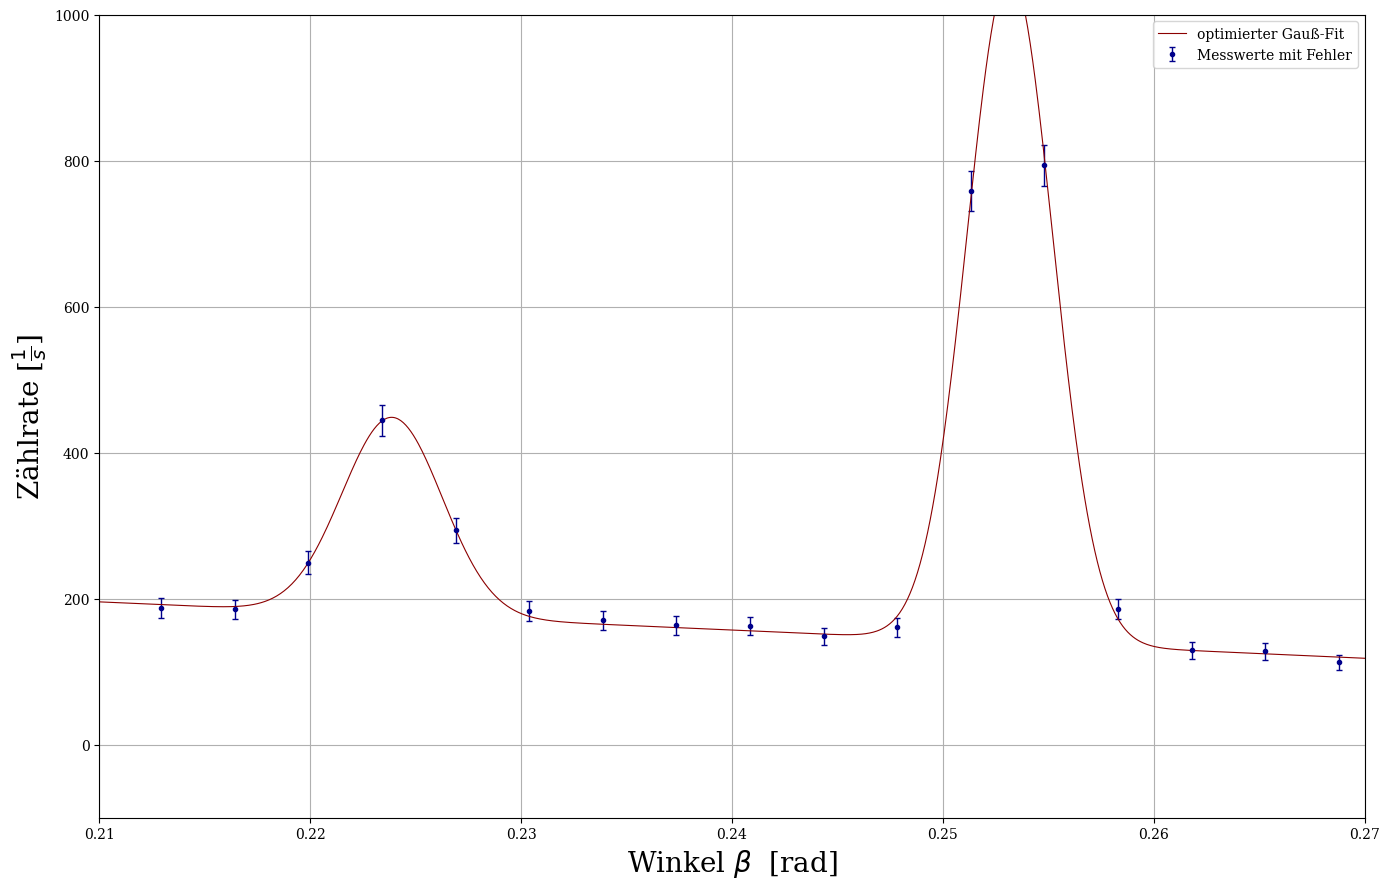

In [61]:

plt.errorbar(beta4, counts5, yerr=counts5_err,linewidth=1,linestyle=' ',marker='.',color='darkblue',label='Messwerte mit Fehler')
x=np.linspace(0.21,0.27,1000)
plt.plot(x,gauß_optimiert(x,*popt8),linewidth=0.8,color='darkred',label='optimierter Gauß-Fit')
plt.xlabel(r'Winkel $\beta$  [rad]', size=20)
plt.ylabel(r'Zählrate [$\frac{1}{s}$]', size=20)
#plt.title(r'Diagramm 10: Analyse der $K_\alpha$- & $K_\beta$-Linie (NaCl, zweite Ordnung)', size=22)
plt.grid()
plt.legend(frameon=True)
plt.xlim(0.21,0.27)
plt.ylim(-100,1000)
plt.tight_layout()
plt.savefig('V255Diagramm10.pdf', format='PDF')

In [55]:
#Güte des Fits 
chi2_8=np.sum((gauß_optimiert(beta4[mask2],*popt8)-counts5[mask2])**2/counts5_err[mask2]**2)

#Freiheitsgrade
dof8=len(beta4[mask2])-8

chi2_8_red=chi2_8/dof8

print('Güte des Fits:')
print('chi_squared= ',chi2_8)
print('chi_squared_red= ',chi2_8_red)
print()


#Fitwahrscheinlichkeit
prob8=round(1-chi2.cdf(chi2_8,dof8),3)*100

print('Fitwahrscheinlichkeit: ',prob8,' %')

Güte des Fits:
chi_squared=  4.246043987828231
chi_squared_red=  0.4717826653142479

Fitwahrscheinlichkeit:  89.4  %


In [56]:
#gesuchte Winkel entsprechen Mittelwerten der Gaußkurven
print('Für die zweite Ordnung folgen die berechneten Winkel:')
print('K_alpha_2: (',popt8[6],' +/- ',popt8[7],') rad' )
print('K_beta_2: (',popt8[3],' +/- ',popt8[4],') rad' )

Für die zweite Ordnung folgen die berechneten Winkel:
K_alpha_2: ( 0.2531853616769591  +/-  0.0020362679802055383 ) rad
K_beta_2: ( 0.22388521051963686  +/-  0.0023728612999788816 ) rad


#### Gitterkonstante von NaCl

In [40]:
#Wellenlängen von K_alpha und K_beta aus Aufgabe 1b) (sowohl erste, als auch zweite Ordnung)
K_a1=lambdaK_alpha1
K_b1=lambdaK_beta1
K_a2=lambdaK_alpha2
K_b2=lambdaK_beta2

lam=np.array([K_a1,K_b1,K_a2,K_b2])
lam_err=np.array([lambdaK_alpha1_err,lambdaK_beta1_err,lambdaK_alpha2_err,lambdaK_beta2_err])

#mit dem Bragg-Gesetz gilt für die Gitterkonstante: a=2*d=n*lam/sin(theta)
n=np.array([1,1,2,2])
theta=np.array([popt7[6],popt7[3],popt8[6],popt8[3]])
theta_err=np.array([popt7[7],popt7[4],popt8[7],popt8[4]])
a=n*lam/np.sin(theta)
a_err=a*np.sqrt((lam_err/lam)**2+(theta_err/np.tan(theta))**2)

a_mean=np.mean(a)
a_mean_err=1/4*np.sum(a_err**2)**0.5
a_mean_std=1/np.sqrt(len(a))*np.std(a)

print('Gitterkonstante:')
print('a_mean = (',round(a_mean*1e12,2),' +/- ',round(a_mean_err*1e12,2),'(sys.) +/- ',round(a_mean_std*1e12,2),'(stat.))pm')

Gitterkonstante:
a_mean = ( 558.33  +/-  4.3 (sys.) +/-  0.99 (stat.))pm


#### Bestimmung der Avodagadro-Konstante $N_A$

In [41]:
#Dichte NaCl
rho=2.164e3 #kg/(m**3)

#Molekulargewicht NaCl
M=58.44e-3 #kg

N_A=4*M/(rho*a_mean**3)
N_A_err=N_A*3*a_mean_err/a_mean
N_A_std=N_A*3*a_mean_std/a_mean

print('Avogadro-Zahl:')
print('N_A = (',round(N_A*1e-23,4),' +/- ',round(N_A_err*1e-23,4),' +/- ',round(N_A_std*1e-23,4),') 10^23 1/mol')
print()

#Vergleich mit dem Literaturwert
N_A_lit=6.0221e23 #1/mol

diff_N_A=np.abs(N_A_lit-N_A)
print('diff_N_A =(',diff_N_A,' +/- ',N_A_err,'(sys.) +/- ',N_A_std,'(stat.)) 1/mol')
print('sigma(sys.)=',round(diff_N_A/N_A_err,2),'; sigma(stat.)=',round(diff_N_A/N_A_std,2))

Avogadro-Zahl:
N_A = ( 6.2065  +/-  0.1436  +/-  0.0329 ) 10^23 1/mol

diff_N_A =( 1.8439297350641365e+22  +/-  1.4356568242201878e+22 (sys.) +/-  3.292932106011728e+21 (stat.)) 1/mol
sigma(sys.)= 1.28 ; sigma(stat.)= 5.6
